In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("household_power_consumption.txt",sep=';')

/media/kavya/DATA/Ubuntu/home/anaconda3/envs/diva/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df = df.replace('?',0)

In [5]:
df = df.astype({'Sub_metering_1': 'float64','Sub_metering_2':'float64'})

In [6]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [7]:
df["hour"] = 0

In [8]:
df["hour"] = df.apply(lambda x: int(x['Time'][:2]),axis=1)

In [9]:
df.drop(['Time','Global_active_power','Global_reactive_power','Voltage','Global_intensity'],axis=1,inplace=True)

In [10]:
df

,Date,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour
0,16/12/2006,0.0,1.0,17.0,17
1,16/12/2006,0.0,1.0,16.0,17
2,16/12/2006,0.0,2.0,17.0,17
3,16/12/2006,0.0,1.0,17.0,17
4,16/12/2006,0.0,1.0,17.0,17
...,...,...,...,...,...
2075254,26/11/2010,0.0,0.0,0.0,20
2075255,26/11/2010,0.0,0.0,0.0,20
2075256,26/11/2010,0.0,0.0,0.0,21
2075257,26/11/2010,0.0,0.0,0.0,21


In [11]:
cols = ['Date','hour','Sub_metering_1','Sub_metering_2','Sub_metering_3']
df = df[cols]

In [12]:
df

,Date,hour,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17,0.0,1.0,17.0
1,16/12/2006,17,0.0,1.0,16.0
2,16/12/2006,17,0.0,2.0,17.0
3,16/12/2006,17,0.0,1.0,17.0
4,16/12/2006,17,0.0,1.0,17.0
...,...,...,...,...,...
2075254,26/11/2010,20,0.0,0.0,0.0
2075255,26/11/2010,20,0.0,0.0,0.0
2075256,26/11/2010,21,0.0,0.0,0.0
2075257,26/11/2010,21,0.0,0.0,0.0


In [13]:
grouped = df.groupby(['Date','hour']).sum()
grouped.reset_index(drop=False, inplace=True)
grouped.reindex(['Date','hour','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)
grouped

,Date,hour,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/2007,0,0.0,35.0,0.0
1,1/1/2007,1,0.0,0.0,0.0
2,1/1/2007,2,0.0,20.0,0.0
3,1/1/2007,3,0.0,16.0,0.0
4,1/1/2007,4,0.0,0.0,0.0
...,...,...,...,...,...
34584,9/9/2010,19,0.0,953.0,98.0
34585,9/9/2010,20,778.0,276.0,822.0
34586,9/9/2010,21,2.0,64.0,68.0
34587,9/9/2010,22,0.0,20.0,67.0


In [14]:
hourly_dict = {}
def create_hourly_dict(row):
    global hourly_dict
    hourly_dict[(row['Date'],row['hour'])] = [row['Sub_metering_1'],row['Sub_metering_2'],row['Sub_metering_3']]

In [15]:
grouped.apply(create_hourly_dict,axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
34584    None
34585    None
34586    None
34587    None
34588    None
Length: 34589, dtype: object

In [17]:
# display hourly_dict uncomment below line
# hourly_dict

In [18]:
q=4
A = np.zeros(shape=(q,q))
n=0
for key in hourly_dict:
    val = hourly_dict[key]
    w = np.matrix([1,val[0],val[1],val[2]]).T
    A += w*w.T
    n = A[0,0]

In [19]:
A

array([[3.45890000e+04, 2.29913500e+06, 2.66103100e+06, 1.32351670e+07],
       [2.29913500e+06, 1.69402787e+09, 3.89904335e+08, 1.51513712e+09],
       [2.66103100e+06, 3.89904335e+08, 2.36904742e+09, 1.50227203e+09],
       [1.32351670e+07, 1.51513712e+09, 1.50227203e+09, 1.17698950e+10]])

In [20]:
M = A[1:,1:]
mean = np.matrix(A[1:,0]/n).T
print(mean)

[[ 66.47012056]
 [ 76.93286883]
 [382.64092631]]


In [21]:
SigmaHat = M/n - mean*mean.T

In [22]:
s = np.sqrt(np.diag(SigmaHat))
D = np.diag(1/s)

In [23]:
print("R:\n")
D*SigmaHat*D #R

R:



matrix([[1.        , 0.11663789, 0.19764912],
        [0.11663789, 1.        , 0.12706124],
        [0.19764912, 0.12706124, 1.        ]])

In [24]:
means = df.groupby('hour').mean()
means.reset_index(drop=False, inplace=True)
means.reindex(['hour','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)

,hour,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,0.360294,0.549167,2.966651
1,1,0.246021,0.393269,2.351931
2,2,0.144136,0.345998,2.027166
3,3,0.066956,0.345882,1.692080
4,4,0.046519,0.329632,1.866275
5,5,0.035207,0.311312,2.135749
6,6,0.038885,0.329655,4.236972
7,7,0.301053,0.496241,10.743926
8,8,1.353296,0.996229,12.657799
9,9,1.453424,1.065013,12.544001


In [25]:
x = list(means['hour'])
Sub_metering_1 = list(means['Sub_metering_1'])
Sub_metering_2 = list(means['Sub_metering_2'])
Sub_metering_3 = list(means['Sub_metering_3'])

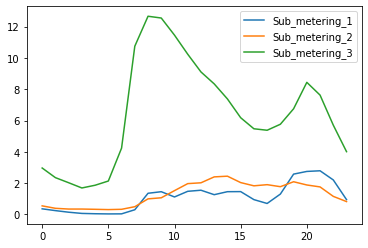

In [26]:
plt.plot(x, Sub_metering_1, label = "Sub_metering_1")
plt.plot(x, Sub_metering_2, label = "Sub_metering_2")
plt.plot(x, Sub_metering_3, label = "Sub_metering_3")
plt.legend()
plt.show()